In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [27]:
g = 9.18 # Gravity (m/s²)


In [ ]:
# 1. Projectile Motion Equations (Calculus-based)
def calculate_trajectory(v0, theta):
  
#   Calculates the trajectory of the object
#   v0: Initial velocity (m/s)
#   theta: Initial angle (degrees)
  theta_rad = np.radians(theta) #Convert degrees to radians
  # Calculus: Time of flight
  t_flight = (2 * v0 * np.sin(theta_rad)) / g
  t = np.linspace(0,t_flight,100) # 
  
  # Linear Algebra: Vector components
  x = v0 * np.cos(theta_rad) * t # Horizontal distance
  y = v0 * np.sin(theta_rad) * t - 0.5 * g * t**2 # Vertical distance
  
  # Velocity equation
  v_x = v0 * np.cos(theta_rad) * np.ones_like(t) # Horizontal velocity
  v_y = v0 * np.sin(theta_rad) - g * t # Vertical velocity
  
  return t , x , y, v_x , v_y
  
 

In [38]:
# 2. Data Analysis with Pandas
def analyze_trajectory(t, x, y, v_x, v_y):
    """දත්ත විශ්ලේෂණය සහ DataFrame නිර්මාණය"""
    df = pd.DataFrame({
        'Time': t,
        'X_position': x,
        'Y_position': y,
        'X_velocity': v_x,
        'Y_velocity': v_y
    })
    
    # අමතර ගණනය කිරීම්
    df['Velocity'] = np.sqrt(df['X_velocity']**2 + df['Y_velocity']**2)  # සම්පූර්ණ ප්‍රවේගය
    df['Acceleration'] = np.gradient(df['Velocity'], df['Time'])  # ත්වරණය
    
    analysis = {
        'Max Height': df['Y_position'].max(),
        'Range': df['X_position'].iloc[-1],
        'Flight Time': df['Time'].iloc[-1],
        'Impact Velocity': df['Velocity'].iloc[-1]
    }
    
    return df, pd.Series(analysis)

In [40]:
# 3. Visualization
def plot_trajectory(df, title="Projectile Motion"):
    """ගමන් පථය ප්‍රස්තාර කිරීම"""
    plt.figure(figsize=(10, 6))
    plt.plot(df['X_position'], df['Y_position'], 'b-', label='Trajectory')
    plt.title(title)
    plt.xlabel('Horizontal Distance (m)')
    plt.ylabel('Vertical Height (m)')
    plt.grid(True)
    plt.legend()
    plt.show()

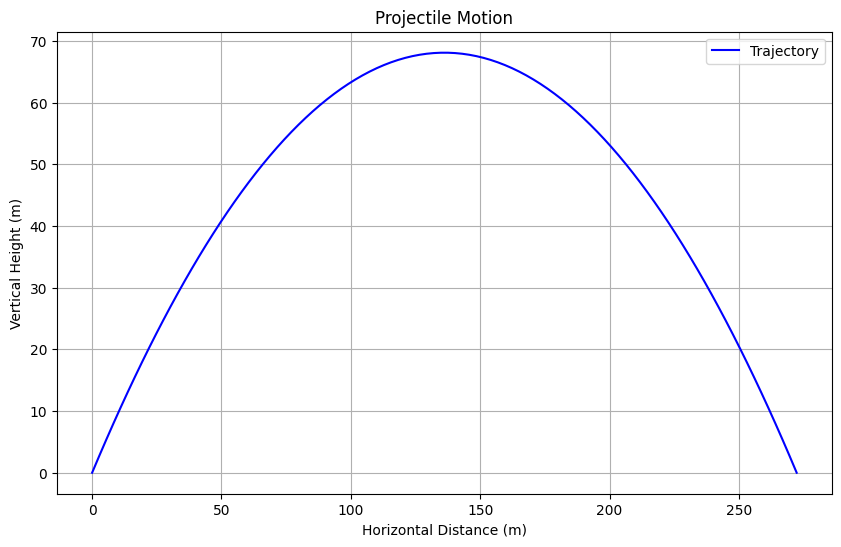

In [42]:
t , x , y, v_x , v_y = calculate_trajectory(50,45)
df,a = analyze_trajectory(t,x,y,v_x,v_y)
plot_trajectory(df)

In [43]:
def create_animation(x, y):
    """ගතිශීලී ඇනිමේෂන්"""
    fig, ax = plt.subplots(figsize=(8, 5))
    
    def update(frame):
        ax.clear()
        ax.plot(x[:frame], y[:frame], 'b-')
        ax.scatter(x[frame], y[frame], color='red', s=50)
        ax.set_xlim(0, max(x)*1.1)
        ax.set_ylim(0, max(y)*1.1)
        ax.grid(True)
        return ax
    
    anim = FuncAnimation(fig, update, frames=len(x), interval=50)
    plt.close()
    return HTML(anim.to_jshtml())

In [44]:
create_animation(x,y)